In [38]:
import pandas as pd
import tensorflow as tf
from skimage import io 
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np

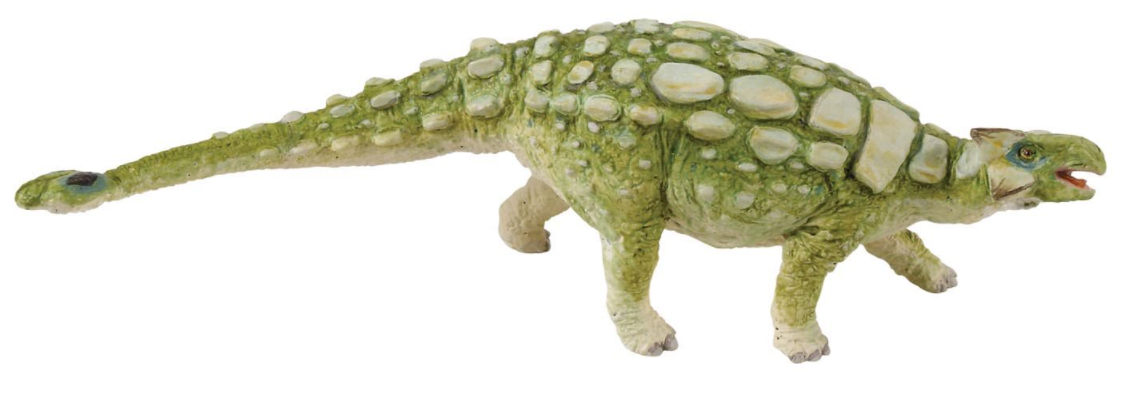

In [39]:
PIL.Image.open('data/ankylosaurus/1.png')

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 2161 files belonging to 17 classes.
Using 1729 files for training.
Found 2161 files belonging to 17 classes.
Using 432 files for validation.


In [41]:
for element in train_ds:
  print(element)


(<tf.Tensor: shape=(32, 300, 500, 3), dtype=float32, numpy=
array([[[[127.0916   , 127.90945  , 182.07632  ],
         [124.33408  , 139.28175  , 183.68457  ],
         [ 95.194    , 124.754    , 164.6012   ],
         ...,
         [ 80.24289  ,  78.42743  ,  87.59672  ],
         [ 61.359406 ,  89.68583  , 100.36392  ],
         [ 46.930145 ,  93.78659  , 104.043915 ]],

        [[123.72128  , 146.30528  , 165.09512  ],
         [127.23704  , 153.03209  , 190.19     ],
         [ 90.1436   , 117.3896   , 177.6096   ],
         ...,
         [ 77.38817  ,  78.47064  ,  81.70149  ],
         [ 58.98174  ,  87.167145 ,  91.807144 ],
         [ 45.285606 ,  91.8499   ,  95.651764 ]],

        [[150.4304   , 190.878    , 219.8788   ],
         [150.91321  , 187.7544   , 235.27399  ],
         [118.957985 , 147.27798  , 203.63399  ],
         ...,
         [ 82.737015 ,  87.537674 ,  81.67568  ],
         [ 67.417    ,  93.82692  ,  87.15459  ],
         [ 51.560497 ,  92.5648   ,  87.1078

2024-04-06 17:41:35.761171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
class_names = train_ds.class_names


2024-04-06 17:41:37.693264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


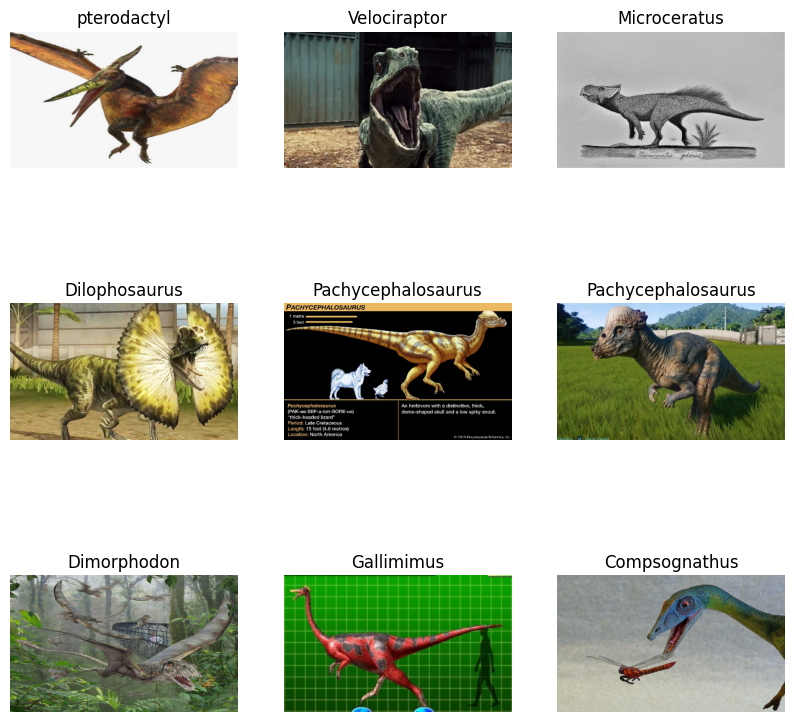

In [43]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  500,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [45]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(300, 500, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 300, 500, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 150, 250, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 150, 250, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 75, 125, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 125, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 37, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 146816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    18,792,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,455,061 (215.36 MB)

 Trainable params: 18,818,353 (71.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,636,708 (143.57 MB)

In [47]:
epochs = 4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)


Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 662ms/step - accuracy: 0.0791 - loss: 4.2307 - val_accuracy: 0.0625 - val_loss: 2.7248
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 681ms/step - accuracy: 0.0899 - loss: 2.7033 - val_accuracy: 0.0926 - val_loss: 2.6166
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.0977 - loss: 2.6471 - val_accuracy: 0.1181 - val_loss: 2.8639
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 660ms/step - accuracy: 0.1365 - loss: 2.6401 - val_accuracy: 0.1458 - val_loss: 2.6507
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.1598 - loss: 2.5918 - val_accuracy: 0.1597 - val_loss: 2.5760
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - accuracy: 0.1672 - loss: 2.5195 - val_accuracy: 0.1736 - val_loss: 2.6590
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - accuracy: 0.1770 - loss: 2.5338 - val_accuracy: 0.1736 - val_loss: 2.5947
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 673ms/step - accuracy: 0.2142 - loss: 2.4281 - val_accu

In [ ]:
epochs = 4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 660ms/step - accuracy: 0.3885 - loss: 1.9031 - val_accuracy: 0.2870 - val_loss: 2.4135
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.3487 - loss: 1.9726 - val_accuracy: 0.2708 - val_loss: 2.5985
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 682ms/step - accuracy: 0.4146 - loss: 1.8247 - val_accuracy: 0.2894 - val_loss: 2.3144
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 666ms/step - accuracy: 0.4495 - loss: 1.6666 - val_accuracy: 0.3241 - val_loss: 2.4590
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - accuracy: 0.4757 - loss: 1.6561 - val_accuracy: 0.2847 - val_loss: 2.4482
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 656ms/step - accuracy: 0.4718 - loss: 1.6408 - val_accuracy: 0.2986 - val_loss: 2.4325
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 660ms/step - accuracy: 0.4797 - loss: 1.6148 - val_accuracy: 0.2847 - val_loss: 2.5593
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.4615 - loss: 1.6527 - val_accu

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [49]:
acc

[0.08675535023212433,
 0.10584152489900589,
 0.1069982647895813,
 0.1434355080127716,
 0.17524580657482147,
 0.1920185089111328,
 0.19895893335342407,
 0.23481781780719757,
 0.2596876919269562,
 0.27067670226097107,
 0.3065355718135834,
 0.32793521881103516,
 0.32793521881103516,
 0.36205899715423584,
 0.38056680560112]

In [50]:
val_acc 

[0.0625,
 0.09259258955717087,
 0.1180555522441864,
 0.1458333283662796,
 0.1597222238779068,
 0.1736111044883728,
 0.1736111044883728,
 0.20370370149612427,
 0.21759259700775146,
 0.24074074625968933,
 0.2291666716337204,
 0.24768517911434174,
 0.2708333432674408,
 0.25231480598449707,
 0.2708333432674408]

In [51]:

img = tf.keras.utils.load_img(
    'anktest.jpeg', target_size=(300, 500)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image most likely belongs to Pachycephalosaurus with a 66.77 percent confidence.


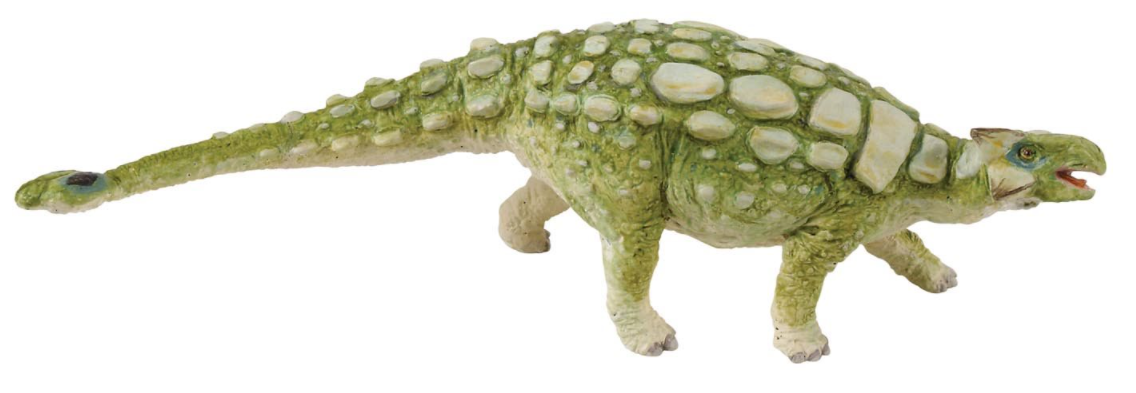

In [52]:
tf.keras.preprocessing.image.load_img('data/ankylosaurus/1.png')

In [8]:
tf?

In [7]:
df = pd.read_csv('data/dinosaur.csv')
df

,Name,Period,Diet,Country
0,Aardonyx,Jurassic,herbivore,South Africa
1,Abelisaurus,Cretaceous,carnivore,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa
3,Abrosaurus,Jurassic,herbivore,China
4,Abydosaurus,Cretaceous,herbivore,North America
...,...,...,...,...
1149,Zizhongosaurus,Jurassic,herbivore,China
1150,Zuniceratops,Cretaceous,herbivore,North America
1151,Zuolong,Jurassic,carnivore,China
1152,Zupaysaurus,Triassic,carnivore,South America
